<a href="https://colab.research.google.com/github/DanielPopoola/data-science-projects/blob/main/SafariCNNwithTensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('/content/drive/MyDrive/Projects/data-science-projects')

4 classes:
['elephant', 'giraffe', 'lion', 'zebra']


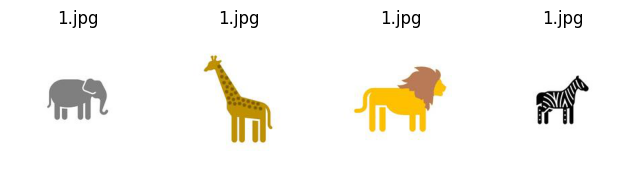

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
%matplotlib inline

# The images are in the data/shapes folder
data_folder = 'datasets/safari/training'

# Get the class names
classes = os.listdir(data_folder)
classes.sort()
print(len(classes), 'classes:')
print(classes)

# Show the first image in each folder
fig = plt.figure(figsize=(8, 12))
i = 0
for sub_dir in os.listdir(data_folder):
    i+=1
    img_file = os.listdir(os.path.join(data_folder,sub_dir))[0]
    img_path = os.path.join(data_folder, sub_dir, img_file)
    img = mpimg.imread(img_path)
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file)
plt.show()

In [9]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import optimizers

img_size = (200,200)
batch_size = 30

print('Getting ready...')
datagen = ImageDataGenerator(rescale= 1./255,
                                    validation_split=0.3)

print('Preparing training dataset...')
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size= img_size,
    batch_size= batch_size,
    class_mode= 'categorical',
    subset= 'training'
)

print('Preparing validation dataset')
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size= img_size,
    batch_size= batch_size,
    class_mode= 'categorical',
    subset= 'validation'
)

classnames = list(train_generator.class_indices.keys())
print('Data generators ready')

Getting ready...
Preparing training dataset...
Found 280 images belonging to 4 classes.
Preparing validation dataset
Found 116 images belonging to 4 classes.
Data generators ready


In [12]:
model = Sequential()

model.add(Conv2D(32, (6,6), input_shape=train_generator.image_shape, activation='elu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (6,6), activation='elu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (6,6), activation='elu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(train_generator.num_classes, activation='softmax'))

learning_rate = 0.001
opt = optimizers.Adam(lr=learning_rate)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 195, 195, 32)      3488      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 97, 97, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 92, 92, 32)        36896     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 32)        36896     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 20, 20, 32)      

In [13]:
num_epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data= validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs
)

Epoch 1/5
9/9 [==============================] - 115s 12s/step - loss: 3.4572 - accuracy: 0.2000 - val_loss: 1.7379 - val_accuracy: 0.2667
Epoch 2/5
9/9 [==============================] - 41s 5s/step - loss: 1.3908 - accuracy: 0.4960 - val_loss: 0.7315 - val_accuracy: 0.8222
Epoch 3/5
9/9 [==============================] - 41s 5s/step - loss: 0.4725 - accuracy: 0.8440 - val_loss: 0.2247 - val_accuracy: 0.9556
Epoch 4/5
9/9 [==============================] - 43s 5s/step - loss: 0.1558 - accuracy: 0.9800 - val_loss: 0.0957 - val_accuracy: 0.9889
Epoch 5/5
9/9 [==============================] - 42s 5s/step - loss: 0.0482 - accuracy: 1.0000 - val_loss: 0.0199 - val_accuracy: 1.0000


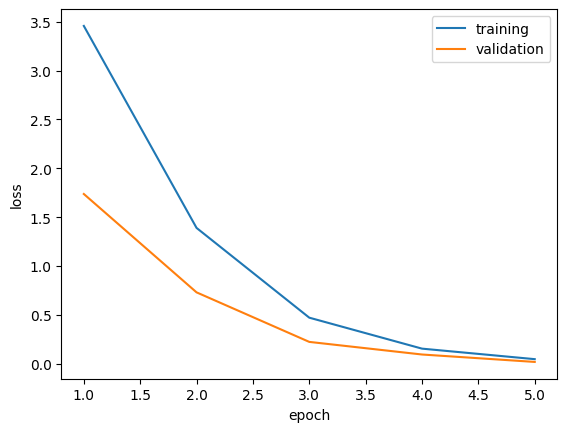

In [14]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Generating predictions from validation data...
1/1 [==============================] - 2s 2s/step


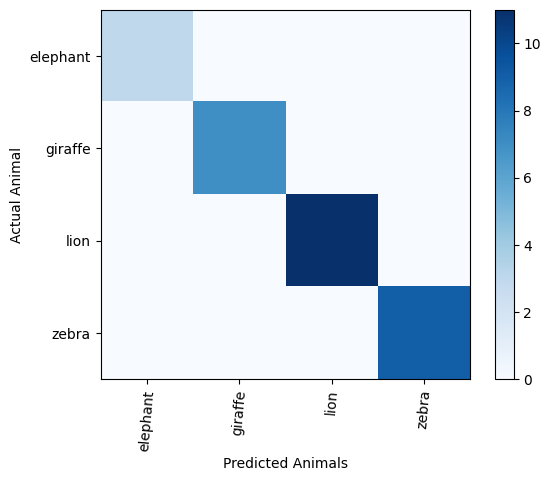

In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Animals")
plt.ylabel("Actual Animal")
plt.show()

In [16]:
# Save the trained model
modelFileName = 'models/animal_classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('model saved as', modelFileName)

model saved as models/animal_classifier.h5


1/1 [==============================] - 0s 55ms/step


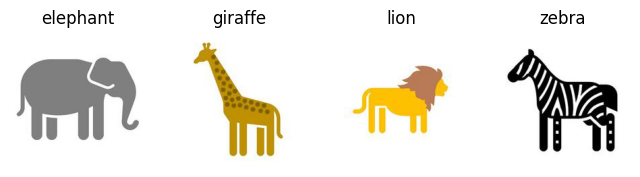

In [17]:
from tensorflow.keras import models
import numpy as np
import os
%matplotlib inline

# Function to predict the class of an image
def predict_image(classifier, image):
    from tensorflow import convert_to_tensor
    # The model expects a batch of images as input, so we'll create an array of 1 image
    imgfeatures = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])

    # We need to format the input to match the training data
    # The generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    imgfeatures = imgfeatures.astype('float32')
    imgfeatures /= 255
    
    # Use the model to predict the image class
    class_probabilities = classifier.predict(imgfeatures)
    
    # Find the class predictions with the highest predicted probability
    index = int(np.argmax(class_probabilities, axis=1)[0])
    return index


# Load your model
model = models.load_model(modelFileName) # loads the saved model

# The images are in the datasets/safari folder
test_data_path = 'datasets/safari/test'

# Show the test images with predictions
fig = plt.figure(figsize=(8, 12))
i = 0
for img_file in os.listdir(test_data_path):
    i+=1
    img_path = os.path.join(test_data_path, img_file)
    img = mpimg.imread(img_path)
    # Get the image class prediction
    index = predict_image(model, np.array(img))
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(classes[index])
plt.show()
